TASK目标：本次任务的目的有二：

第一、学习两个新的DL核心技巧（BN和DA）；

第二、了解熟悉一个重要的数据：猫狗大战。

本次TASK具体要求如下：

（1）学习BN和DA的基本技术思想，并应用到你的猫狗大战学习上；

（2）对你的代码逐行注释，尤其是涉及到BN和DA的部分，以确认你真的懂了；

（3）请对代码逐行注释，尤其要对model.summary中呈现的参数个数做详细解释。这对帮助大家更好地理解模型结构帮助巨大！ 

（4）最后，请回报你在猫狗大战上的，验证集分类精度。本次TASK要用自己构造的DL模型。请注意：严禁使用迁移学习，迁移学习是下一个TASK。

# 自己构建的模型

In [3]:
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import numpy as np
from keras import callbacks
from keras.models import Sequential, model_from_yaml, load_model
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from keras.optimizers import Adam, SGD
from keras.preprocessing import image
from keras.utils import np_utils, plot_model 
from sklearn.model_selection import train_test_split
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [45]:
os.chdir('F:/大三（上）/深度学习/TASK5.1：DL核心技术 - BN + DA/dogs-vs-cats')

In [46]:
os.getcwd()

'F:\\大三（上）\\深度学习\\TASK5.1：DL核心技术 - BN + DA\\dogs-vs-cats'

In [47]:
#数据集目录
path = "./train"
#训练集目录
train_path = path+'/train'
#测试集目录
test_path = path+'/test'

In [43]:
import glob
import shutil

In [48]:
#将某类图片移动到该类的文件夹下
def img_to_file(path):
    print("=========开始移动图片============")
    #如果没有dog类和cat类文件夹，则新建
    if not os.path.exists(path+"/dog"):
            os.makedirs(path+"/dog")
    if not os.path.exists(path+"/cat"):
            os.makedirs(path+"/cat")
    print("共：{}张图片".format(len(glob.glob(path+"/*.jpg"))))
    #通过glob遍历到所有的.jpg文件
    for imgPath in glob.glob(path+"/*.jpg"):
        #print(imgPath)
        #使用/划分
        img=imgPath.strip("\n").replace("\\","/").split("/")
        #print(img)
        #将图片移动到指定的文件夹中
        if img[-1].split(".")[0] == "cat":
            shutil.move(imgPath,path+"/cat")
        if img[-1].split(".")[0] == "dog":
            shutil.move(imgPath,path+"/dog")
    print("=========移动图片完成============") 
img_to_file(train_path)
print("训练集猫共：{}张图片".format(len(glob.glob(train_path+"/cat/*.jpg"))))
print("训练集狗共：{}张图片".format(len(glob.glob(train_path+"/dog/*.jpg"))))

=========开始移动图片============
共：25000张图片
=========移动图片完成============
训练集猫共：12500张图片
训练集狗共：12500张图片


In [49]:
import random

def split_train_test(fileDir,tarDir):

        if not os.path.exists(tarDir):
            os.makedirs(tarDir)
        pathDir = os.listdir(fileDir)    #取图片的原始路径
        filenumber=len(pathDir)
        rate=0.1    #自定义抽取图片的比例，比方说100张抽10张，那就是0.1
        picknumber=int(filenumber*rate) 
        #按照rate比例从文件夹中取一定数量图片
        sample = random.sample(pathDir, picknumber)  
        #随机选取picknumber数量的样本图片
        print("=========开始移动图片============")
        for name in sample:
                shutil.move(fileDir+name, tarDir+name)
        print("=========移动图片完成============")
split_train_test(train_path+'/dog/',test_path+'/dog/')  
split_train_test(train_path+'/cat/',test_path+'/cat/')  

=========开始移动图片============
=========移动图片完成============
=========开始移动图片============
=========移动图片完成============


In [51]:
from keras.preprocessing.image import ImageDataGenerator  # 图片预处理

IMSIZE=128   # 图片像素

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'F:/大三（上）/深度学习/TASK5.1：DL核心技术 - BN + DA/dogs-vs-cats/train/test',   # 数据路径
    target_size=(IMSIZE, IMSIZE),   # 数据像素（目标大小）
    batch_size=200)                # 批处理大小  # 生成验证数据集

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'F:/大三（上）/深度学习/TASK5.1：DL核心技术 - BN + DA/dogs-vs-cats/train/train',
    target_size=(IMSIZE, IMSIZE),
    batch_size=200)  

Found 2500 images belonging to 2 classes.
Found 22500 images belonging to 2 classes.


In [52]:
import numpy as np   # 导入库
X,Y=next(validation_generator)   # 分批吐出数据
print(X.shape)
print(Y.shape)
Y[:,0]     # 矩阵

(200, 128, 128, 3)
(200, 2)


array([0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

<Figure size 432x288 with 0 Axes>

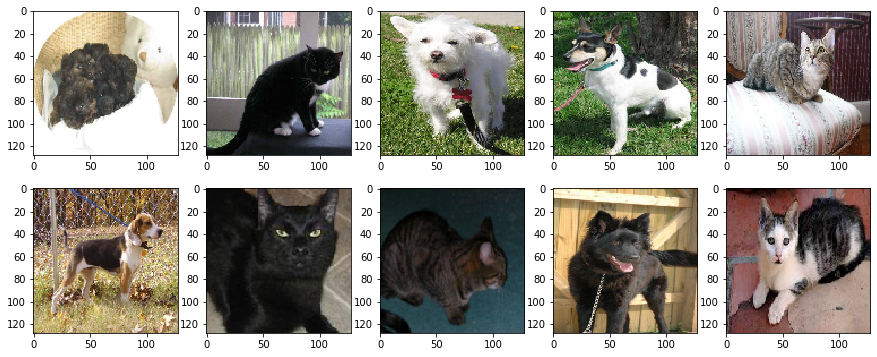

In [53]:
from matplotlib import pyplot as plt    # 导入画板

plt.figure()                  # 创建画板
fig,ax = plt.subplots(2,5)    # 将面板切分成2行5列
fig.set_figheight(6)          # 高为6
fig.set_figwidth(15)          # 宽为15
ax=ax.flatten()               # 拉直
for i in range(10): ax[i].imshow(X[i,:,:,:])   # 展示

In [56]:
from keras.layers import Conv2D,MaxPooling2D   # 导入各种层函数
from keras.layers import Flatten,Input,BatchNormalization,Dense   # 导入各种层函数
from keras import Model   # 模型
IMSIZE = 128
n_channel=50       # 卷积核
input_layer=Input([IMSIZE,IMSIZE,3])   # 定义一个通道为3的128*128的彩色图片
x=input_layer       # 赋值
x=BatchNormalization()(x)   # 训练数据集
x=Conv2D(n_channel,[2,2],activation='relu')(x)  #2*2规则的100个卷积核
x=MaxPooling2D([16,16])(x)    # 最大池化，大小为16*16
x=Flatten()(x)     # 拉直
x=Dense(2,activation='softmax')(x)     # 输出2个节点
output_layer=x       #  输出
model2=Model(input_layer,output_layer)   # 基于以上，构建模型
model2.summary()      # 模型结构

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 127, 127, 50)      650       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4902      
Total params: 5,564
Trainable params: 5,558
Non-trainable params: 6
____________________________________________________

类型
以上模型参数清点：

输⼊层: 输⼊的是128*128像素的3通道的图⽚, 不消耗任何参数.

batch_normalization_2 层：每一层消耗4个参数，一共3层，共消耗12个参数.

卷积层：输入50通道的127*127像素，每个卷积核消耗13个参数，所以共消耗650个参数.

最大池化层：7*7像素50通道的立体矩阵

flatten_2 层：将其拉直成2450，不消化任何参数.

dense_2 层：做一个2节点的全连接输出，消耗4902个参数.

合计: 共消耗了: 5,564个参数, 其中需要训练的参数个数为:5,558，不需要训练的参数个数为：6.

In [57]:
model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
#模型编译，损失函数为交叉熵；优化器为Adam；学习速率为0.01 ；衡量指标为精度
model2.fit_generator(train_generator,epochs=2,validation_data=validation_generator)
# 训练10轮；模型训练，⽤训练集

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
113/113 [==============================] - 441s 4s/step - loss: 0.7762 - accuracy: 0.6480 - val_loss: 0.6376 - val_accuracy: 0.6680
Epoch 2/2
113/113 [==============================] - 317s 3s/step - loss: 0.5310 - accuracy: 0.7371 - val_loss: 0.5218 - val_accuracy: 0.7660


# 课件代码学习注释

<center> <h1> 重要技巧：BatchNormalization </h1> </center>



# BatchNormalization: 影响力

>  Batch Normalization是2015年Google研究员在论文《Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift》一文中提出的，同时也将BN应用到了2014年的GoogLeNet上，也就是Inception-v2。截止2019年3月16号，google引用量9000+次：


# 数据存储结构

In [1]:
%ls ./data/CatDog              # 案例数据根目录
%ls ./data/CatDog/validation/   # 验证数据
%ls ./data/CatDog/train/        # 训练数据

train/  validation/
cats/  dogs/
cats/  dogs/


# 数据生成器

In [2]:
from keras.preprocessing.image import ImageDataGenerator  # 图片预处理

IMSIZE=128   # 图片像素

validation_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    './data/CatDog/validation',   # 数据路径
    target_size=(IMSIZE, IMSIZE),   # 数据像素（目标大小）
    batch_size=200,                 # 批处理大小
    class_mode='categorical')   # 生成验证数据集

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    './data/CatDog/train',
    target_size=(IMSIZE, IMSIZE),
    batch_size=200,
    class_mode='categorical')   # 生成训练数据集

Using TensorFlow backend.


Found 10000 images belonging to 2 classes.
Found 15000 images belonging to 2 classes.


# 验证数据：生成

In [3]:
import numpy as np   # 导入库
X,Y=next(validation_generator)   # 分批吐出数据
print(X.shape)
print(Y.shape)
Y[:,0]     # 矩阵

(200, 128, 128, 3)
(200, 2)


array([1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.], dtype=float32)

# 数据展示

<Figure size 432x288 with 0 Axes>

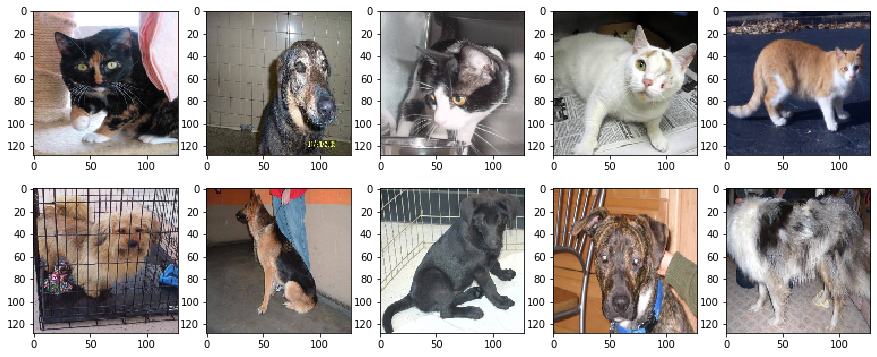

In [4]:
from matplotlib import pyplot as plt    # 导入画板

plt.figure()                  # 创建画板
fig,ax = plt.subplots(2,5)    # 将面板切分成2行5列
fig.set_figheight(6)          # 高为6
fig.set_figwidth(15)          # 宽为15
ax=ax.flatten()               # 拉直
for i in range(10): ax[i].imshow(X[i,:,:,:])   # 展示

# BatchNormalization: Batch & Epoch


> 在训练神经网络时，不是一次发送整个输入数据集，而是随机的将输入分成几个大小相等的块，每一个块叫做一个batch。

> 周期（epoch）被定义为所有batch的一次训练迭代。

# 模型（1）：逻辑回归

In [5]:
from keras.layers import Flatten,Input,BatchNormalization,Dense   # 导入各种层函数
from keras import Model   # 模型
input_layer=Input([IMSIZE,IMSIZE,3])    # 定义一个通道为3的128*128的彩色图片
x=input_layer    # 赋值
x=BatchNormalization()(x)     # 训练数据集
x=Flatten()(x)    # 拉直
x=Dense(2,activation='softmax')(x)   # 全连接到2个节点，逻辑回归
output_layer=x    #  输出
model1=Model(input_layer,output_layer)   # 基于以上，构建模型
model1.summary()    # 模型结构

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
flatten_1 (Flatten)          (None, 49152)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 98306     
Total params: 98,318
Trainable params: 98,312
Non-trainable params: 6
_________________________________________________________________


以上模型参数清点：

输⼊层: 输⼊的是128*128像素的3通道的图⽚, 不消耗任何参数.

batch_normalization_1 层：每一层消耗4个参数，一共3层，共消耗12个参数.

flatten_1 层：将x拉直，不消化任何参数.

dense_1层:做一个2个节点的全连接输出,消耗98306个参数.

合计: 共消耗了: 98318个参数, 其中需要训练的参数个数为:98312，不需要训练的参数个数为：6.

In [6]:
from keras.optimizers import Adam     # 导⼊优化器Adam
model1.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
#模型编译，损失函数为交叉熵；优化器为Adam；学习速率为0.01 ；衡量指标为精度
model1.fit_generator(train_generator,epochs=2,validation_data=validation_generator)  
# 训练10轮；模型训练，⽤训练集

Epoch 1/2
75/75 [==============================] - 67s 899ms/step - loss: 14.7344 - accuracy: 0.5398 - val_loss: 9.3965 - val_accuracy: 0.5085
Epoch 2/2
75/75 [==============================] - 50s 661ms/step - loss: 3.9882 - accuracy: 0.5931 - val_loss: 1.0538 - val_accuracy: 0.5351


# 模型（2）：宽模型

In [7]:
from keras.layers import Conv2D,MaxPooling2D   # 导入各种层函数

n_channel=100       # 卷积核
input_layer=Input([IMSIZE,IMSIZE,3])   # 定义一个通道为3的128*128的彩色图片
x=input_layer       # 赋值
x=BatchNormalization()(x)   # 训练数据集
x=Conv2D(n_channel,[2,2],activation='relu')(x)  #2*2规则的100个卷积核
x=MaxPooling2D([16,16])(x)    # 最大池化，大小为16*16
x=Flatten()(x)     # 拉直
x=Dense(2,activation='softmax')(x)     # 输出2个节点
output_layer=x       #  输出
model2=Model(input_layer,output_layer)   # 基于以上，构建模型
model2.summary()      # 模型结构

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 127, 127, 100)     1300      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 100)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4900)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 9802      
Total params: 11,114
Trainable params: 11,108
Non-trainable params: 6
_______________________________________________________

以上模型参数清点：

输⼊层: 输⼊的是128*128像素的3通道的图⽚, 不消耗任何参数.

batch_normalization_2 层：每一层消耗4个参数，一共3层，共消耗12个参数.

卷积层：输入100通道的127*127像素，每个卷积核消耗13个参数，所以共消耗1300个参数.

最大池化层：7*7像素100通道的立体矩阵

flatten_2 层：将其拉直成4900，不消化任何参数.

dense_2 层：做一个2节点的全连接输出，消耗9802个参数.

合计: 共消耗了: 11114个参数, 其中需要训练的参数个数为:11108，不需要训练的参数个数为：6.

In [9]:
model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
#模型编译，损失函数为交叉熵；优化器为Adam；学习速率为0.01 ；衡量指标为精度
model2.fit_generator(train_generator,epochs=2,validation_data=validation_generator)
# 训练10轮；模型训练，⽤训练集

# 模型（3）：深度模型

In [10]:
n_channel=20      # 卷积核
input_layer=Input([IMSIZE,IMSIZE,3])    # 定义一个通道为3的128*128的彩色图片
x=input_layer     # 赋值
x=BatchNormalization()(x)    # 训练数据集
for _ in range(7):          
    x=Conv2D(n_channel,[2,2],padding='same',activation='relu')(x)  # 7层卷积
    x=MaxPooling2D([2,2])(x)     # 7层最大池化

x=Flatten()(x)      # 拉直
x=Dense(2,activation='softmax')(x)      # 输出2个节点
output_layer=x          # 输出
model3=Model(input_layer,output_layer)    # 基于以上，构建模型
model3.summary()    # 模型结构

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 20)      260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 20)        1620      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 20)        1620

以上模型参数清点：

输⼊层: 输⼊的是128*128像素的3通道的图⽚, 不消耗任何参数.

batch_normalization_3 层：每一层消耗4个参数，一共3层，共消耗12个参数.

7层卷积层：输入20通道的分别为64x64,32x32,16x16，8x8，4x4，2x2，1x1像素，共消耗260+1620x6=9980个参数.

7层最大池化层：1*1像素20通道的立体矩阵，不消化任何参数.

flatten_2 层：将其拉直成20，不消化任何参数.

dense_2 层：做一个2节点的全连接输出，消耗42个参数.

合计: 共消耗了: 10034个参数, 其中需要训练的参数个数为:10028，不需要训练的参数个数为：6.

# 模型训练与验证

In [12]:
model3.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
#模型编译，损失函数为交叉熵；优化器为Adam；学习速率为0.01 ；衡量指标为精度
model3.fit_generator(train_generator,epochs=2,validation_data=validation_generator)
# 训练10轮；模型训练，⽤训练集

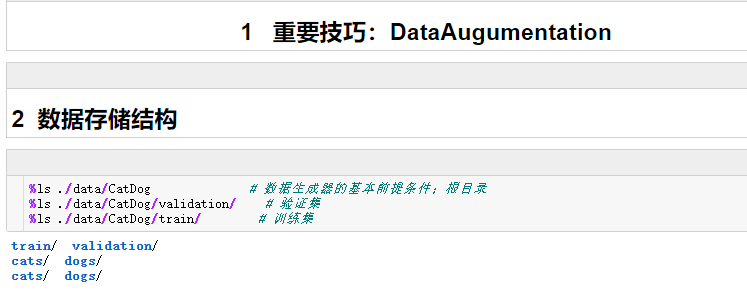

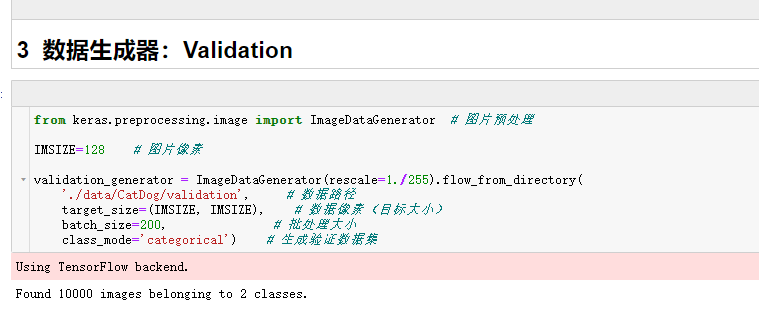

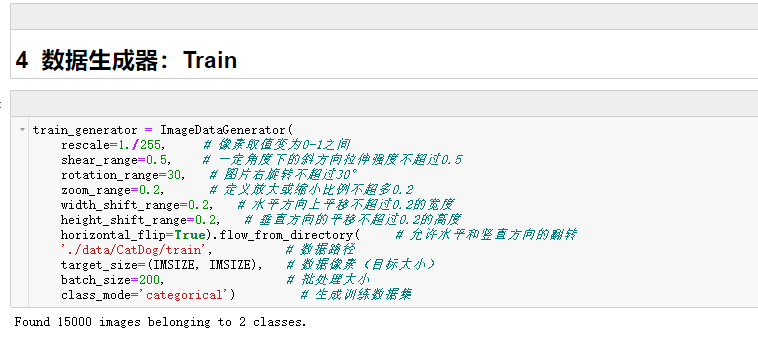

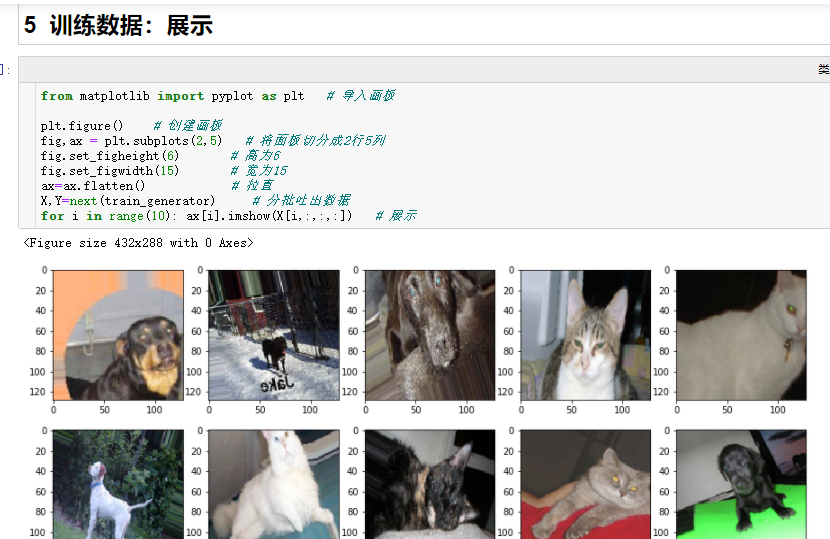

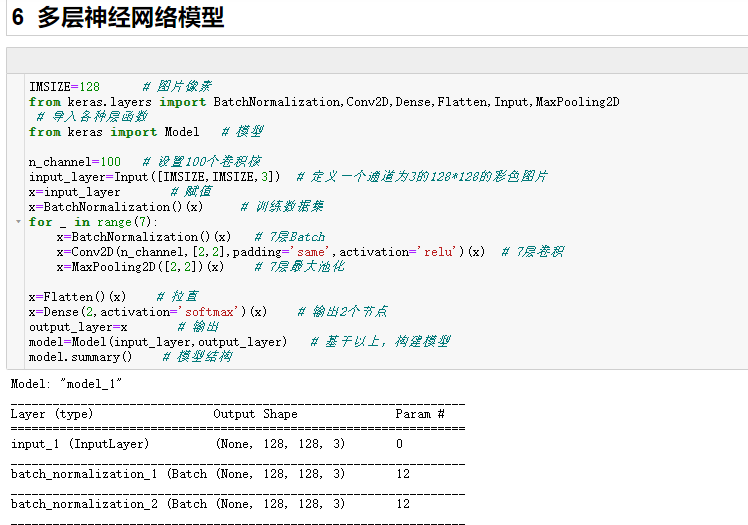

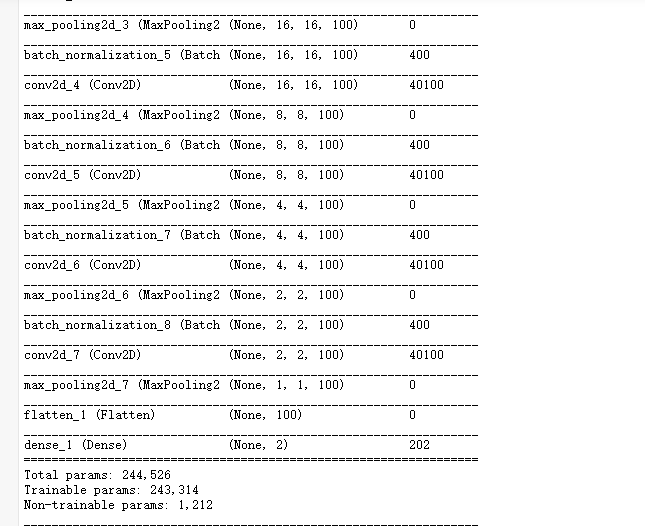

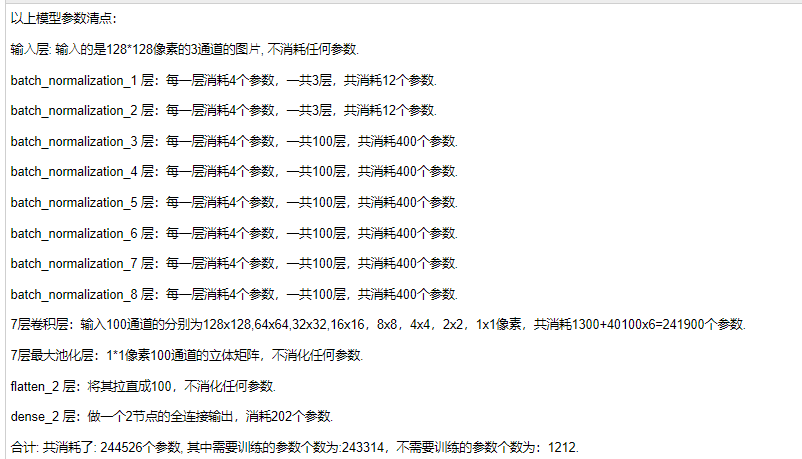

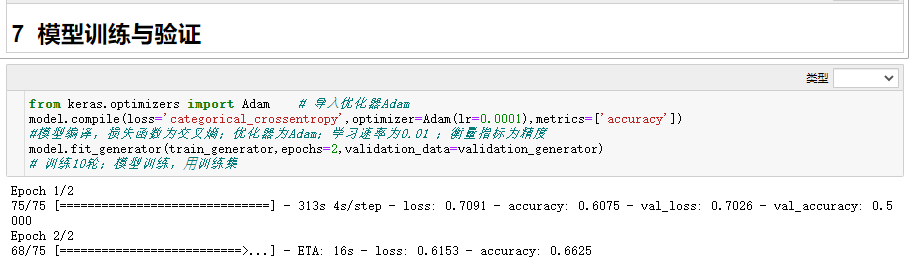

如果不做数据加强，模型效果并不是很好。

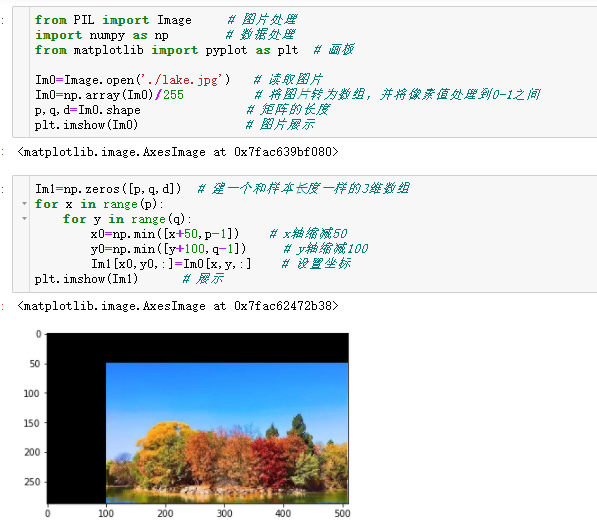

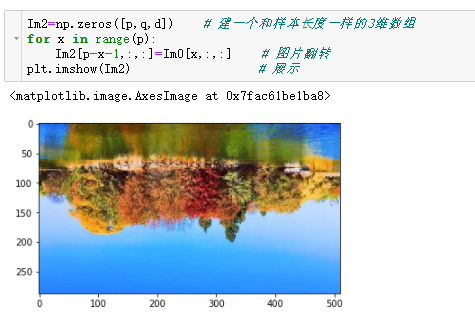

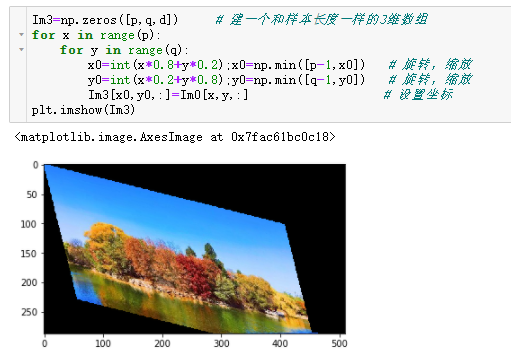

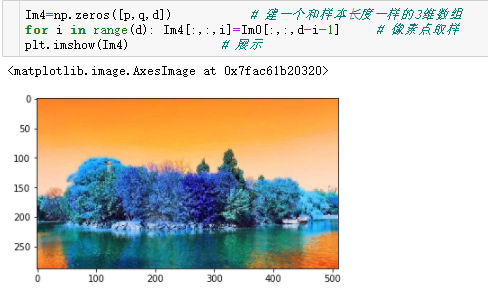

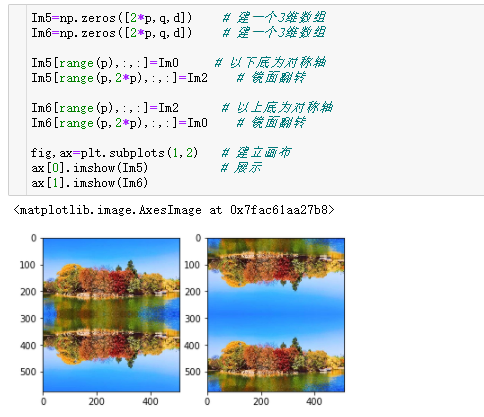

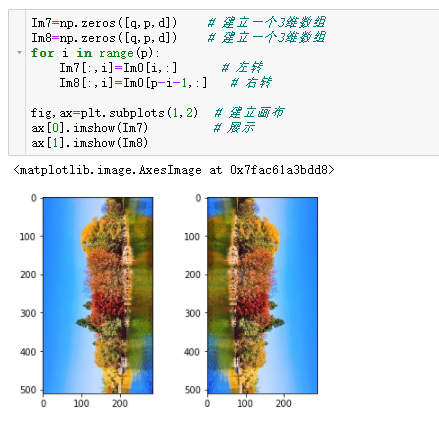